✅ Resultados exportados a: incertidumbre_resultados.csv
    mm   |b|  u_b_rel_%  u_b_abs_uT
0  270  0.56  22.777778    0.127556
1  281  0.56  21.929917    0.122808
2  280  1.02  22.004174    0.224443
3  279  1.54  22.078977    0.340016
4  277  0.51  22.230244    0.113374


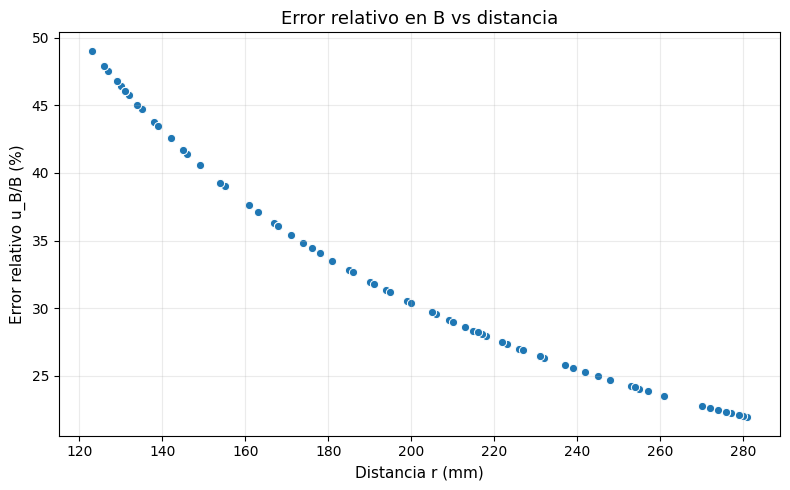

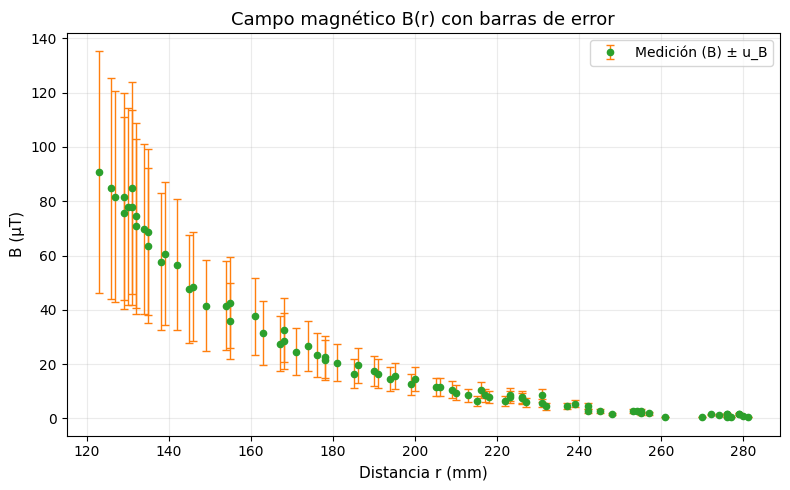

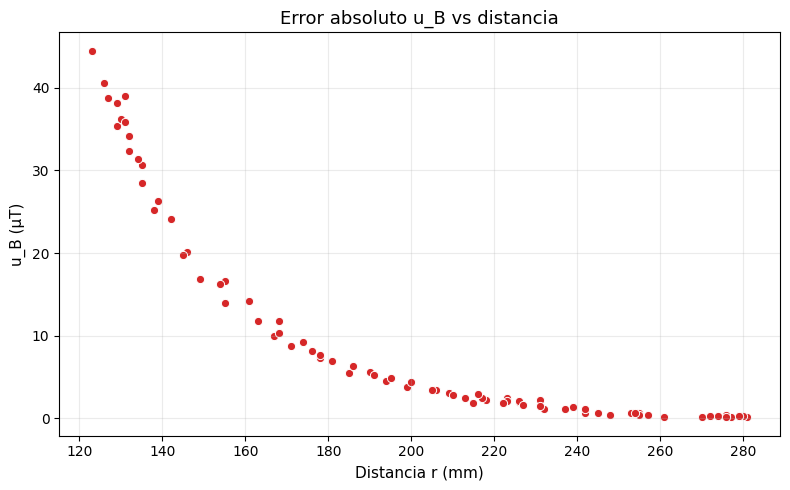

In [1]:

# -*- coding: utf-8 -*-
"""
Propagación de incertidumbres para B(r) y visualizaciones
Autor: (tu nombre)
Descripción:
 - Lee 'mediciones_sensores.csv' con columnas: mm, |B|
 - Calcula u_B/B y u_B usando:
      (u_B/B)^2 = (u_m/m)^2 + (3*u_r/r)^2
 - Genera gráficos y exporta resultados a CSV.

Requisitos: pandas, numpy, matplotlib (opcional: seaborn)
"""

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --------------------------
# Parámetros (ajusta aquí)
# --------------------------
UM_REL = 0.05    # incertidumbre relativa en m (p.ej., 5% -> 0.05)
UR_ABS_MM = 20.0 # incertidumbre absoluta en distancia r (en mm)
CSV_FILE = "mediciones_sensores.csv"

# --------------------------
# Lectura y preparación de datos
# --------------------------
if not os.path.exists(CSV_FILE):
    raise FileNotFoundError(f"No se encontró el archivo '{CSV_FILE}' en el directorio actual.")

# Lee CSV
df = pd.read_csv(CSV_FILE)

# Normaliza nombres de columnas (quita espacios y pasa a minúsculas)
df.columns = [c.strip().lower().replace(" ", "_") for c in df.columns]

# Identifica columnas de distancia y campo magnético
# Tu CSV típico: 'mm' y '|b|'. Manejamos ambos casos.
if 'mm' not in df.columns:
    raise ValueError("No se encontró la columna 'mm' (distancia) en el CSV.")
# Busca columna del campo: puede ser 'b', '|b|' o similar
cand_b = [c for c in df.columns if 'b' in c]
if not cand_b:
    raise ValueError("No se encontró una columna que contenga 'b' (campo magnético) en el CSV.")
b_col = cand_b[0]  # toma la primera que coincida (ej. '|b|')

# Extrae series
r_mm = df['mm'].astype(float)
B_uT = df[b_col].astype(float)

# --------------------------
# Cálculo de incertidumbres
# --------------------------
# Fórmula de propagación:
# (u_B / B)^2 = (UM_REL)^2 + (3 * UR_ABS_MM / r_mm)^2
uB_rel = np.sqrt(UM_REL**2 + (3.0 * UR_ABS_MM / r_mm)**2)   # adimensional
uB_abs = B_uT * uB_rel                                      # en µT

# Añade columnas al DataFrame
df['u_b_rel_%'] = 100.0 * uB_rel
df['u_b_abs_uT'] = uB_abs

# --------------------------
# Exporta tabla de resultados
# --------------------------
out_csv = "incertidumbre_resultados.csv"
df.to_csv(out_csv, index=False)
print(f"✅ Resultados exportados a: {out_csv}")
print(df.head())

# --------------------------
# Gráfico 1: Error relativo (%) vs Distancia (mm)
# --------------------------
plt.figure(figsize=(8, 5))
plt.scatter(r_mm, df['u_b_rel_%'], s=35, c="#1f77b4", edgecolors='white', linewidths=0.7)
plt.title("Error relativo en B vs distancia", fontsize=13)
plt.xlabel("Distancia r (mm)", fontsize=11)
plt.ylabel("Error relativo u_B/B (%)", fontsize=11)
plt.grid(True, alpha=0.25)
plt.tight_layout()
plt.savefig("error_relativo_vs_distancia.png", dpi=200)
plt.show()

# --------------------------
# Gráfico 2: B(r) con barras de error (u_B)
# --------------------------
plt.figure(figsize=(8, 5))
plt.errorbar(r_mm, B_uT, yerr=uB_abs, fmt='o', ms=4.5, elinewidth=1.0,
             ecolor="#ff7f0e", capsize=3, color="#2ca02c", label="Medición (B) ± u_B")
plt.title("Campo magnético B(r) con barras de error", fontsize=13)
plt.xlabel("Distancia r (mm)", fontsize=11)
plt.ylabel("B (µT)", fontsize=11)
plt.grid(True, alpha=0.25)
plt.legend()
plt.tight_layout()
plt.savefig("B_con_barras_de_error.png", dpi=200)
plt.show()

# --------------------------
# (Opcional) Gráfico 3: u_B absoluto vs distancia
# --------------------------
plt.figure(figsize=(8, 5))
plt.scatter(r_mm, uB_abs, s=35, c="#d62728", edgecolors='white', linewidths=0.7)
plt.title("Error absoluto u_B vs distancia", fontsize=13)
plt.xlabel("Distancia r (mm)", fontsize=11)
plt.ylabel("u_B (µT)", fontsize=11)
plt.grid(True, alpha=0.25)
plt.tight_layout()
plt.savefig("error_absoluto_vs_distancia.png", dpi=200)
plt.show()

# --------------------------
# Notas:
# - Si conoces mejor UM_REL o UR_ABS_MM (por calibración, hoja de datos, etc.),
#   cámbialos al inicio.
# - Si el archivo tiene distintas cabeceras, ajusta 'mm' y 'b_col' arriba.
# --------------------------


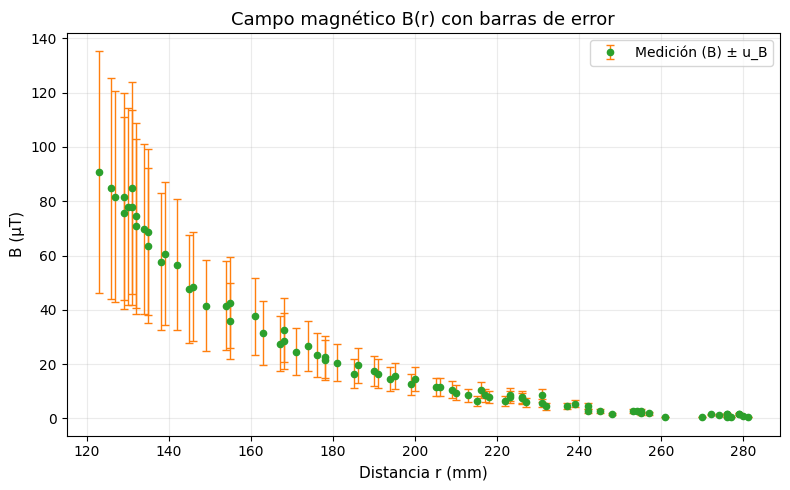

In [2]:

# Guardar el gráfico con un nombre específico para LaTeX
plt.figure(figsize=(8, 5))
plt.errorbar(r_mm, B_uT, yerr=uB_abs, fmt='o', ms=4.5, elinewidth=1.0,
             ecolor="#ff7f0e", capsize=3, color="#2ca02c", label="Medición (B) ± u_B")
plt.title("Campo magnético B(r) con barras de error", fontsize=13)
plt.xlabel("Distancia r (mm)", fontsize=11)
plt.ylabel("B (µT)", fontsize=11)
plt.grid(True, alpha=0.25)
plt.legend()
plt.tight_layout()

# Nombre del archivo para LaTeX
plt.savefig("fig_errorbars.png", dpi=300)  # alta resolución para publicación
plt.show()
